In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
df=pd.read_csv('calendar.csv')

In [3]:
df.shape

(1393570, 4)

In [4]:
df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [6]:
df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
dic={'t':1, 'f':0}
df['available']=df['available'].map(dic)

In [10]:
lis1=df.groupby(['listing_id'])['available'].sum().median()

lis1

308.0

In [11]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [12]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day


In [13]:
def numeric_converter(df):
    
        df=df.str.strip('% $ ,')
        df=df.str.replace(',', '')
        df=pd.to_numeric(df,downcast='float')
        return df

In [31]:
month=range(1,13,1)
def target(par1,df):
    y=[]
    for i in range(1,13,1):
           y.append(df[df['date'].dt.month==i][par1].mean())    
    
    return y

In [15]:
df['price']=numeric_converter(df['price'])

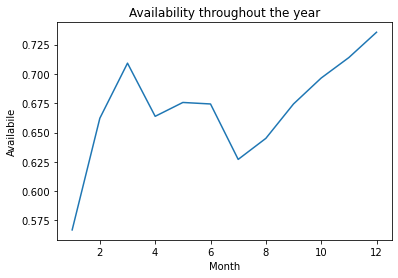

In [32]:

plt.plot(month,target('available',df))

plt.xlabel('Month')
plt.ylabel('Availabile')
plt.title('Availability throughout the year')
plt.show()

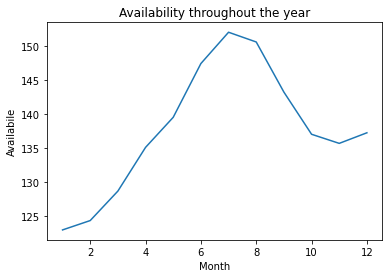

In [33]:

plt.plot(month,target('price',df))

plt.xlabel('Month')
plt.ylabel('Availabile')
plt.title('Availability throughout the year')
plt.show()

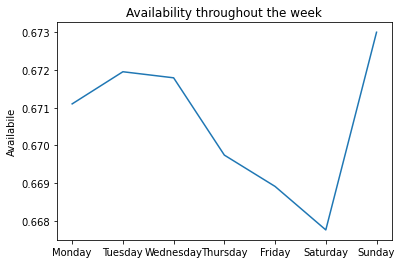

In [35]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def target2(par1,df):
    y=[]
    for i in range(0,7,1):
           y.append(df[df['date'].dt.dayofweek==i][par1].mean())    
    
    return y
plt.plot(week,target2('available',df))
#plt.xlabel('Week')
plt.ylabel('Availabile')
plt.title('Availability throughout the week')
plt.show()

In [36]:
df_list=pd.read_csv('listings.csv')



df_list=df_list[['id','zipcode','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']]

df3=pd.merge(df,df_list, left_on='listing_id',right_on='id')

In [20]:
df3.head()

,listing_id,date,available,price,year,month,day,id,zipcode,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,2016-01-04,1,85.0,2016,1,4,241032,98119,Queen Anne,West Queen Anne,Queen Anne
1,241032,2016-01-05,1,85.0,2016,1,5,241032,98119,Queen Anne,West Queen Anne,Queen Anne
2,241032,2016-01-06,0,NaN,2016,1,6,241032,98119,Queen Anne,West Queen Anne,Queen Anne
3,241032,2016-01-07,0,NaN,2016,1,7,241032,98119,Queen Anne,West Queen Anne,Queen Anne
4,241032,2016-01-08,0,NaN,2016,1,8,241032,98119,Queen Anne,West Queen Anne,Queen Anne


In [37]:
df3.groupby('neighbourhood_group_cleansed')['available'].sum().sort_values(ascending=False)

neighbourhood_group_cleansed
Other neighborhoods    194661
Capitol Hill           132668
Downtown               125725
Central Area            90556
Queen Anne              66804
Ballard                 58115
West Seattle            51950
Rainier Valley          38914
University District     33148
Beacon Hill             30270
Delridge                21545
Northgate               21105
Lake City               18801
Cascade                 18717
Magnolia                17248
Seward Park             10921
Interbay                 3394
Name: available, dtype: int64

In [22]:
df3.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Magnolia               198.694336
Downtown               187.343048
Queen Anne             176.117889
Cascade                154.033173
West Seattle           148.155807
Central Area           134.883728
Capitol Hill           134.671890
Ballard                125.905983
Other neighborhoods    125.622017
Interbay               118.421036
Seward Park            111.110336
University District    104.709938
Beacon Hill            100.668777
Rainier Valley         100.104927
Lake City               94.518593
Northgate               93.455528
Delridge                90.926941
Name: price, dtype: float32

In [23]:
df3.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Fairmount Park         370.000000
Portage Bay            250.885284
Industrial District    245.875443
Windermere             227.516098
Alki                   226.410736
                          ...    
Holly Park              78.184593
Georgetown              78.025108
Riverview               77.346275
Olympic Hills           66.256790
Roxhill                 60.000000
Name: price, Length: 81, dtype: float32

In [39]:
def plott(loc_group,loc):
    
    df_plot=df3[df3[loc_group]==loc]
    
    fig,ax = plt.subplots()
    
    ax.plot(month, target('available',df_plot), color="orange", marker="o")
    
    ax.set_ylabel("Availability ratio/year",color="orange",fontsize=11)
    
    ax2=ax.twinx()
    
    ax2.plot(month, target('price',df_plot),color="blue",marker="o")
    
    ax2.set_ylabel("Average Price $",color="blue",fontsize=11)
    
   
    plt.title('Availability throughout the year')
    plt.show()
    

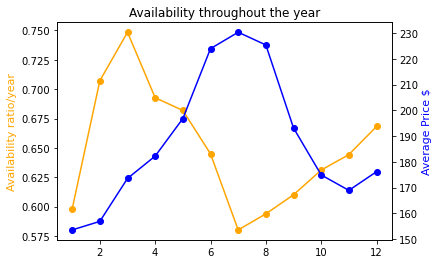

In [40]:
plott('neighbourhood_group_cleansed','Downtown')

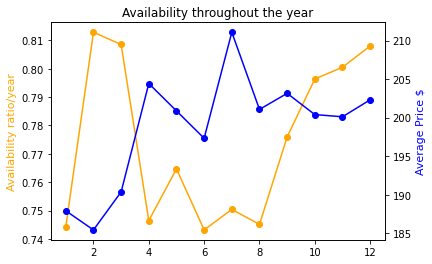

In [41]:
plott('neighbourhood_group_cleansed','Magnolia')

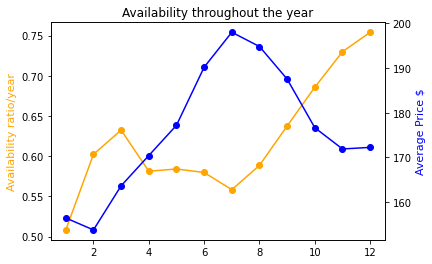

In [42]:
plott('neighbourhood_group_cleansed','Queen Anne')

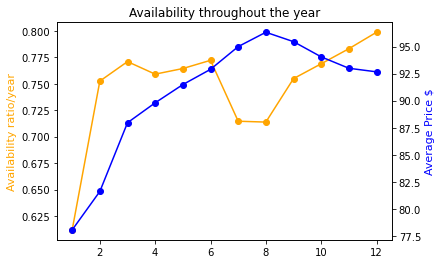

In [43]:
plott('neighbourhood_group_cleansed','Delridge')